In [2]:
import numpy as np

In [3]:
import pandas as pd

In [4]:
from scipy import spatial

In [5]:
train=pd.read_csv('ytrain.csv',usecols=[1,2,3])
test=pd.read_csv('ytest.csv',usecols=[1,2,3])



In [6]:
import math

In [7]:
import time

In [10]:
K=[i for i in range(1,121)]
error=[0 for i in range(1,121)]
mae=[0 for i in range(1,121)]
gim=[0 for i in range(1,121)]
gpim=[0 for i in range(1,121)]
count_gim=[0 for i in range(1,121)]
count_gpim=[0 for i in range(1,121)]
t1=time.time()
for index,i in test.iterrows():
    predicted=0
    usr=int(i['userId'])
    mov=int(i['itemId'])
    actual=i['rating']
        
    all_ratings_for_the_active_item=train[train['itemId']==mov]
    list_of_movies_current_user_has_rated=train[train['itemId']==usr]
    similarity=[]
    corres_rate=[]
    
    for ind2,u in list_of_movies_current_user_has_rated.iterrows():
        c1=[]
        c2=[]
        #c_user=int(u['userId'])
        c_item=int(u['itemId'])
        #list_curuser=train[train['userId']==c_user]
        list_curitem=train[train['itemId']==c_item]
        xt=pd.merge( all_ratings_for_the_active_item,list_curitem,how='inner',on=['userId'])
        c1=xt['rating_x']
        c2=xt['rating_y']
        c1_list=c1.tolist()
        c2_list=c2.tolist()
        sim=0
        if len(c1_list)!=0:
            sim=(1-spatial.distance.cosine(c1_list,c2_list))
        
        similarity.append(sim)
        corres_rate.append(u['rating'])
        
    corres_rate = [x for _,x in sorted(zip(similarity,corres_rate),reverse=True)]
    similarity.sort(reverse=True)
    #for k in K:
    cs=0
    numc=0
    for k in K:
        
        if (k-1)>=len(similarity):
            for m in range(k,121):
                error[m-1]+=((actual-predicted)**2)
                mae[m-1]+=(abs(actual-predicted))
                if predicted >3:
                    gpim[m-1]+=(abs(actual-predicted))
                    count_gpim[m-1]+=1
                if actual >3:
                    gim[m-1]+=(abs(actual-predicted))
                    count_gim[m-1]+=1
                
                
                
            break
            
            
            
            
        cs+=similarity[k-1]
        numc+=(similarity[k-1]*corres_rate[k-1])
       
        if cs!=0:
            predicted=numc/cs
        error[k-1]+=((actual-predicted)**2)
        mae[k-1]+=(abs(actual-predicted))
        if predicted >3:
            gpim[k-1]+=(abs(actual-predicted))
            count_gpim[k-1]+=1
        if actual >3:
            gim[k-1]+=(abs(actual-predicted))
            count_gim[k-1]+=1
        
    
    
t2=time.time()        
#print(math.sqrt(error/c))
#print(math.sqrt(error/c))

In [11]:
%matplotlib inline

In [12]:
index

53999

In [13]:
error2=[math.sqrt(i/index) for i in error]

In [14]:
mae2=[i/index for i in mae]

In [15]:
gim2=[i/j for i,j in zip(gim,count_gim)]

In [16]:
gpim2=[i/j for i,j in zip(gpim,count_gpim)]

In [17]:
import matplotlib.pyplot as plt

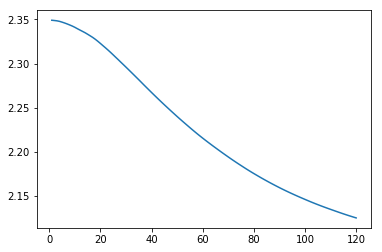

In [18]:
plt.plot(K,error2)

In [19]:
 error2.index(min(error2))

119

In [20]:
min(error2)

2.1247863672243423

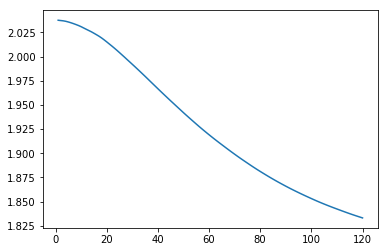

In [21]:
plt.plot(K,mae2)

In [22]:
mae2.index(min(mae2))

119

In [23]:
min(mae2)

1.8330808971064545

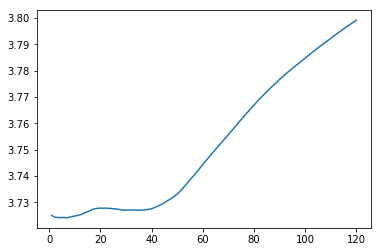

In [24]:
plt.plot(K,gim2)

In [25]:
gim2.index(min(gim2))

6

In [26]:
min(gim2)

3.7240321270643446

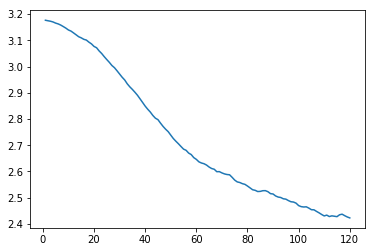

In [27]:
plt.plot(K,gpim2)

In [28]:
gpim2.index(min(gpim2))

119

In [29]:
min(gpim2)

2.4229913897503228